## Recognizing Handwritten Digits Using scikit-learn Library
'''
In today’s blog we are going to analyze the digits data-set of the Sci-Kit learn library. We are going to train a Support Vector Machine and then we will be predicting the values of a few unknown Handwritten digits.

In [1]:
# Let us start by importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()

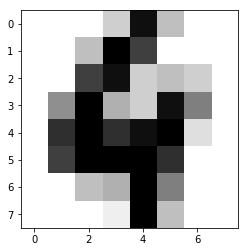

In [2]:
# Our data-set is stored in digits
# Following is an example of a digit in our dataset. It consists of 64 pixels (8X8).
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r, interpolation='nearest')

The 1792 nd element in our data-set
Let us train our SVM with the first 1790 images in out data-set. After that we will use the remaining Data-set as our test data and check the accuracy of our training machine.

In [3]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(digits.data[1:1791], digits.target[1:1791])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
svc.predict(digits.data[1791:1797])

array([4, 9, 0, 8, 9, 8])

In [5]:
digits.target[1791:1797]

array([4, 9, 0, 8, 9, 8])

Both predicted and target values are same

As we can see we have achieved 100% accuracy. Let us now define a function that will find the accuracy of our SVM and train our model with varying data-set. We will start with 3 elements in our training data and work our way up to 1790 data and store the accuracy of our models in a dictionary

In [6]:
def accuracy(a,b):
    hit = miss =0.0
    for i in range(len(a)):
        if(a[i] == b[i]):
            hit = hit+1
        else :
            miss = miss+1
    acc = (hit/(hit+miss))*100
    return acc

In [7]:
values = dict()
for x in range(3,1797):
    svc.fit(digits.data[1:x], digits.target[1:x])
    values[x] = accuracy(svc.predict(digits.data[1791:1797]),digits.target[1791:1797])

The values dictionary holds all the accuracies


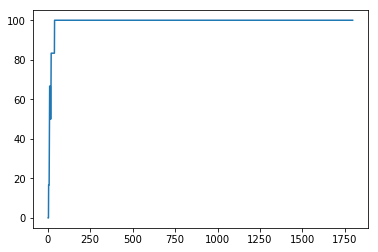

In [20]:
# Let us plot our dictionary.
lists = sorted(values.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.show()

accuracy vs size of training-set

As we can clearly see for well above 95% of our models the achieved accuracy is 100% . Hence we can easily conclude that our model works for more than 95% of the time.